In [1]:
import pandas as pd

# Load the CSV files into dataframes
df1 = pd.read_csv('/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/social_media.csv')
df2 = pd.read_csv('/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/social_media-US-monthly-200904-202312.csv')

# Print the first few rows of the dataframes
print(df1.head())
print(df2.head())

      Date  Facebook  Pinterest  Twitter  StumbleUpon  YouTube  Instagram  \
0  2009-04     20.16        0.0     6.86        36.79      0.0        0.0   
1  2009-05     24.30        0.0     9.95        33.78      0.0        0.0   
2  2009-06     26.48        0.0    10.56        29.65      0.0        0.0   
3  2009-07     29.10        0.0    10.35        33.55      0.0        0.0   
4  2009-08     34.25        0.0    11.15        29.01      0.0        0.0   

   Tumblr  reddit  VKontakte  ...  MySpace  Fark  NowPublic  iWiW  \
0     0.0    8.98        0.0  ...    14.81  0.22       0.04  0.29   
1     0.0    7.62        0.0  ...     8.95  0.44       0.05  2.10   
2     0.0   12.13        0.0  ...     7.66  0.66       0.05  2.35   
3     0.0    9.52        0.0  ...     5.49  0.22       0.03  2.21   
4     0.0    9.37        0.0  ...     4.69  0.40       0.08  2.27   

   news.ycombinator.com  Delicious  orkut  Odnoklassniki  Vimeo  Other  
0                  0.08       0.49   1.75        

#etch Google Trends data for the specified social media platforms using the pytrends library:



In [2]:
from pytrends.request import TrendReq
import pandas as pd

# Initialize pytrends
pytrends = TrendReq(hl='en-US', tz=360)

# Define the keywords to search for
social_media_keywords = ["Facebook", "Instagram", "TikTok", "Twitter", "Snapchat"]

# Build the payload
pytrends.build_payload(social_media_keywords, cat=0, timeframe='2009-01-01 2023-12-31', geo='', gprop='')

# Get interest over time
social_media_trends_df = pytrends.interest_over_time()

# Resample to end of each month and compute mean
social_media_trends_df = social_media_trends_df.resample('M').mean()

# Save to CSV
social_media_trends_df.to_csv('/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/google_trends_social_media_data.csv')

# Define the keywords to search for
mental_health_keywords = ["mental health", "happiness", "stress", "anxiety", "well-being"]

# Build the payload
pytrends.build_payload(mental_health_keywords, cat=0, timeframe='2009-01-01 2023-12-31', geo='', gprop='')

# Get interest over time
mental_health_trends_df = pytrends.interest_over_time()

# Resample to end of each month and compute mean
mental_health_trends_df = mental_health_trends_df.resample('M').mean()

# Save to CSV
mental_health_trends_df.to_csv('/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/google_trends_mental_health_data.csv')

/var/folders/cy/_nrym7x567b9m_tg6knvmbyw0000gn/T/ipykernel_71143/1098276140.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  social_media_trends_df = social_media_trends_df.resample('M').mean()
/var/folders/cy/_nrym7x567b9m_tg6knvmbyw0000gn/T/ipykernel_71143/1098276140.py:32: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mental_health_trends_df = mental_health_trends_df.resample('M').mean()


In [3]:
import psycopg2

conn = psycopg2.connect(
    dbname="Project_3_USDataSet",
    user="postgres",
    password="Iamnotabody$%8!",
    host="localhost",
    port="5432"
)

In [4]:
# Write your SQL query
query = "SELECT * FROM US_social_media_popularity;"
# Execute the query and load the results into a DataFrame
df = pd.read_sql_query(query, conn)
# Print the DataFrame
print(df)

Empty DataFrame
Columns: [date, facebook, printest, twitter, stumbleupon, reddit, tumbler, youtube, instagram, linkedin, digg, myspace, fark, Google+, nowpublic, news.ycombinator.com, delicious, vkontakte, vimeo, other]
Index: []


/var/folders/cy/_nrym7x567b9m_tg6knvmbyw0000gn/T/ipykernel_71143/1227644039.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


In [5]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
conn = sqlite3.connect('social_media_data.db')

# Define the file paths
file_path1 = "/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/social_media-US-monthly-200904-202312.csv"
file_path2 = "/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/google_trends_social_media_data.csv"

# Read the CSV files into dataframes
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Write the dataframes to SQLite tables
df1.to_sql('us_social_media', conn, if_exists='replace', index=False)
df2.to_sql('google_trends', conn, if_exists='replace', index=False)

180

In [6]:
# Print the first 5 rows of each dataframe
print(df1.head())
print(df2.head())

      Date  Facebook  Pinterest  Twitter  StumbleUpon  reddit  Tumblr  \
0  2009-04     12.89        0.0     6.69        42.45    9.83     0.0   
1  2009-05     15.88        0.0    10.45        42.55    9.10     0.0   
2  2009-06     17.02        0.0    11.25        38.08   14.80     0.0   
3  2009-07     19.08        0.0    10.55        43.41   11.64     0.0   
4  2009-08     24.45        0.0    11.37        38.84   11.85     0.0   

   YouTube  Instagram  LinkedIn  Digg  MySpace  Fark  Google+  NowPublic  \
0      0.0        0.0      0.00  6.02    19.04  0.30      0.0       0.03   
1      0.0        0.0      0.27  6.85    11.06  0.65      0.0       0.04   
2      0.0        0.0      0.50  5.17     9.46  1.03      0.0       0.05   
3      0.0        0.0      0.40  5.05     6.86  0.34      0.0       0.05   
4      0.0        0.0      0.45  3.92     5.85  0.64      0.0       0.08   

   news.ycombinator.com  Delicious  VKontakte  Vimeo  Other  
0                  0.08       0.38        

In [7]:
print(df1.describe())
print(df2.describe())

         Facebook   Pinterest     Twitter  StumbleUpon      reddit  \
count  177.000000  177.000000  177.000000   177.000000  177.000000   
mean    55.872542   15.872203    8.541073     9.106271    2.844576   
std     13.657312   10.193749    4.485564    14.608980    2.548213   
min     12.890000    0.000000    2.300000     0.000000    0.450000   
25%     47.960000    9.950000    5.580000     0.000000    0.920000   
50%     52.670000   16.740000    7.030000     1.130000    1.930000   
75%     68.860000   22.570000   10.170000     9.820000    4.640000   
max     79.280000   37.260000   25.690000    51.500000   14.800000   

           Tumblr     YouTube   Instagram    LinkedIn        Digg     MySpace  \
count  177.000000  177.000000  177.000000  177.000000  177.000000  177.000000   
mean     1.340169    2.063446    2.522938    0.272090    0.447006    0.549153   
std      2.424738    2.210968    4.342683    0.155021    1.177845    2.113822   
min      0.000000    0.000000    0.000000    

In [8]:
print(df1.isnull().sum())
print(df2.isnull().sum())

Date                    0
Facebook                0
Pinterest               0
Twitter                 0
StumbleUpon             0
reddit                  0
Tumblr                  0
YouTube                 0
Instagram               0
LinkedIn                0
Digg                    0
MySpace                 0
Fark                    0
Google+                 0
NowPublic               0
news.ycombinator.com    0
Delicious               0
VKontakte               0
Vimeo                   0
Other                   0
dtype: int64
date         0
Facebook     0
Instagram    0
TikTok       0
Twitter      0
Snapchat     0
isPartial    0
dtype: int64


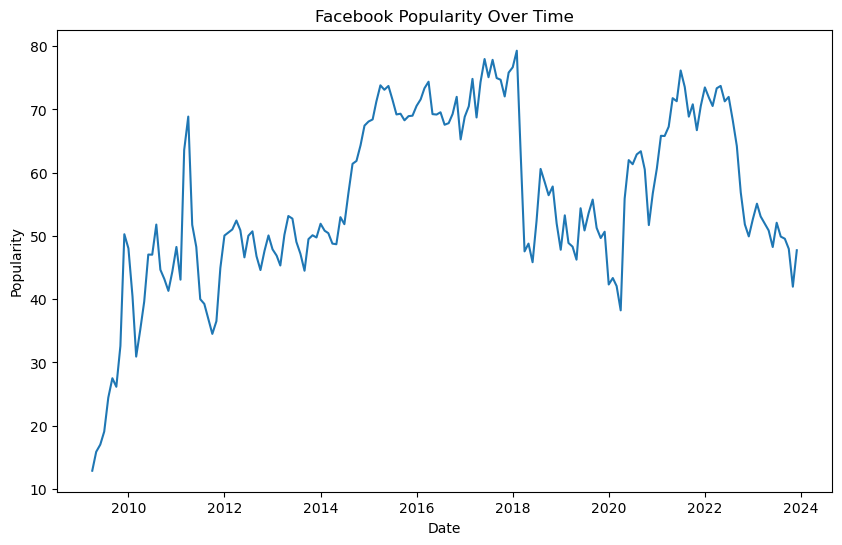

In [9]:
import matplotlib.pyplot as plt

# Plot Facebook popularity over time
plt.figure(figsize=(10,6))
plt.plot(pd.to_datetime(df1['Date']), df1['Facebook'])
plt.title('Facebook Popularity Over Time')
plt.xlabel('Date')
plt.ylabel('Popularity')
plt.show()

In [10]:
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown menu
dropdown = widgets.Dropdown(
    options=['Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'reddit', 'Tumblr', 'YouTube', 'Instagram', 'LinkedIn', 'Digg', 'MySpace', 'Fark', 'Google+', 'NowPublic', 'news.ycombinator.com', 'Delicious', 'VKontakte', 'Vimeo', 'Other'],
    value='Facebook',
    description='Platform:',
)

# Function to plot data
def plot_data(platform):
    plt.figure(figsize=(10,6))
    plt.plot(pd.to_datetime(df1['Date']), df1[platform])
    plt.title(f'{platform} Popularity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.show()

# Function to handle changes in the dropdown menu
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plot_data(change['new'])

dropdown.observe(on_change)

display(dropdown)

Dropdown(description='Platform:', options=('Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'reddit', 'Tumbl…

In [11]:
import glob

# Get a list of all CSV files in the current directory
csv_files = glob.glob('*.csv')

# Print the list of CSV files
for file in csv_files:
    print(file)

In [12]:
import sqlite3
import flask
import pandas
import matplotlib

In [13]:
from flask import Flask, render_template, request
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import io
import base64

social_media_app = Flask(__name__)

@social_media_app.route('/')
def home():
    return render_template('home.html')

@social_media_app.route('/data', methods=['POST'])
def data():
    # ... rest of your code ...

@social_media_app.route('/plot', methods=['POST'])
def plot():
    # ... rest of your code ...

if __name__ == '__main__':
    social_media_app.run(debug=True)

IndentationError: expected an indented block after function definition on line 15 (244106759.py, line 18)

In [ ]:
from sqlalchemy import create_engine
import pandas as pd

# Create a SQLAlchemy engine
engine = create_engine('sqlite:///social_media_data.db')

# Define the file paths
file_path1 = "/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/social_media-US-monthly-200904-202312.csv"
file_path2 = "/Users/NP/Documents/Project-3/Social Media Pouparity 2009-2023/data/google_trends_social_media_data.csv"

# Read the CSV files into dataframes
df1 = pd.read_csv(file_path1)
df2 = pd.read_csv(file_path2)

# Write the dataframes to SQLite tables
df1.to_sql('us_social_media', engine, if_exists='replace', index=False)
df2.to_sql('google_trends', engine, if_exists='replace', index=False)

180

In [ ]:
# Select all records from the 'us_social_media' table
df1 = pd.read_sql_query("SELECT * FROM us_social_media", engine)

# Select all records from the 'google_trends' table
df2 = pd.read_sql_query("SELECT * FROM google_trends", engine)

# Print the first 5 rows of each dataframe
print(df1.head())
print(df2.head())

      Date  Facebook  Pinterest  Twitter  StumbleUpon  reddit  Tumblr  \
0  2009-04     12.89        0.0     6.69        42.45    9.83     0.0   
1  2009-05     15.88        0.0    10.45        42.55    9.10     0.0   
2  2009-06     17.02        0.0    11.25        38.08   14.80     0.0   
3  2009-07     19.08        0.0    10.55        43.41   11.64     0.0   
4  2009-08     24.45        0.0    11.37        38.84   11.85     0.0   

   YouTube  Instagram  LinkedIn  Digg  MySpace  Fark  Google+  NowPublic  \
0      0.0        0.0      0.00  6.02    19.04  0.30      0.0       0.03   
1      0.0        0.0      0.27  6.85    11.06  0.65      0.0       0.04   
2      0.0        0.0      0.50  5.17     9.46  1.03      0.0       0.05   
3      0.0        0.0      0.40  5.05     6.86  0.34      0.0       0.05   
4      0.0        0.0      0.45  3.92     5.85  0.64      0.0       0.08   

   news.ycombinator.com  Delicious  VKontakte  Vimeo  Other  
0                  0.08       0.38        

      Date  Facebook  Pinterest  Twitter  StumbleUpon  reddit  Tumblr  \
0  2009-04     12.89        0.0     6.69        42.45    9.83     0.0   
1  2009-05     15.88        0.0    10.45        42.55    9.10     0.0   
2  2009-06     17.02        0.0    11.25        38.08   14.80     0.0   
3  2009-07     19.08        0.0    10.55        43.41   11.64     0.0   
4  2009-08     24.45        0.0    11.37        38.84   11.85     0.0   

   YouTube  Instagram  LinkedIn  Digg  MySpace  Fark  Google+  NowPublic  \
0      0.0        0.0      0.00  6.02    19.04  0.30      0.0       0.03   
1      0.0        0.0      0.27  6.85    11.06  0.65      0.0       0.04   
2      0.0        0.0      0.50  5.17     9.46  1.03      0.0       0.05   
3      0.0        0.0      0.40  5.05     6.86  0.34      0.0       0.05   
4      0.0        0.0      0.45  3.92     5.85  0.64      0.0       0.08   

   news.ycombinator.com  Delicious  VKontakte  Vimeo  Other  
0                  0.08       0.38        

Dropdown(description='Platform:', options=('Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'reddit', 'Tumbl…

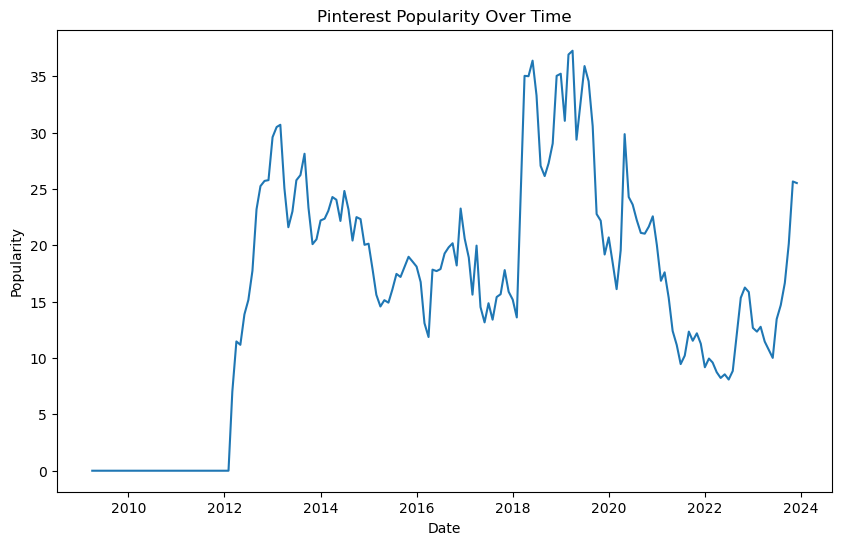

In [ ]:
# Select all records from the 'us_social_media' table
df1 = pd.read_sql_query("SELECT * FROM us_social_media", engine)

# Print the first 5 rows of the dataframe
print(df1.head())

# Print the statistical summary of the dataframe
print(df1.describe())

# Print the number of missing values in each column
print(df1.isnull().sum())

import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display

# Create a dropdown menu
dropdown = widgets.Dropdown(
    options=['Facebook', 'Pinterest', 'Twitter', 'StumbleUpon', 'reddit', 'Tumblr', 'YouTube', 'Instagram', 'LinkedIn', 'Digg', 'MySpace', 'Fark', 'Google+', 'NowPublic', 'news.ycombinator.com', 'Delicious', 'VKontakte', 'Vimeo', 'Other'],
    value='Facebook',
    description='Platform:',
)

# Function to plot data
def plot_data(platform):
    plt.figure(figsize=(10,6))
    plt.plot(pd.to_datetime(df1['Date']), df1[platform])
    plt.title(f'{platform} Popularity Over Time')
    plt.xlabel('Date')
    plt.ylabel('Popularity')
    plt.show()

# Function to handle changes in the dropdown menu
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        plot_data(change['new'])

dropdown.observe(on_change)

display(dropdown)

In [ ]:
Base = automap_base()
Base.prepare(engine, reflect=True)
print(Base.classes.keys())

[]


/var/folders/cy/_nrym7x567b9m_tg6knvmbyw0000gn/T/ipykernel_23872/2547680171.py:2: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [ ]:
from flask import Flask, jsonify, render_template_string
from sqlalchemy import create_engine
import pandas as pd
import plotly.express as px
import plotly.io as pio

app = Flask(__name__)

# Create a SQLAlchemy engine
engine = create_engine('sqlite:///social_media_data.db')

# Load the data when the application starts
df1 = pd.read_sql_query("SELECT * FROM us_social_media", engine)
df2 = pd.read_sql_query("SELECT * FROM google_trends", engine)

@app.route("/api/v1.0/us_social_media")
def us_social_media():
    # Convert dataframe to dictionary
    data = df1.to_dict(orient='records')
    return jsonify(data)

@app.route("/api/v1.0/google_trends")
def google_trends():
    # Convert dataframe to dictionary
    data = df2.to_dict(orient='records')
    return jsonify(data)

@app.route("/plot")
def plot():
    # Create a simple line plot
    fig = px.line(df1, x='Date', y='Facebook')
    # Convert the plot to HTML
    plot_html = pio.to_html(fig, full_html=False)
    # Return the plot as HTML
    return render_template_string("<html><body>{{plot}}</body></html>", plot=plot_html)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel_launcher.py", line 15, in <module>
    from ipykernel import kernelapp as app
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/__init__.py", line 7, in <module>
    from .connect import *
  File "/opt/anaconda3/lib/python3.11/site-packages/ipykernel/connect.py", line 12, in <module>
    import jupyter_client
  File "/opt/anaconda3/lib/python3.11/site-packages/jupyter_client/__init__.py", line 3, in <module>
    from .asynchronous import AsyncKernelClient
  File "/opt/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/__init__.py", line 1, in <module>
    from .client import AsyncKernelClient  # noqa
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/opt/anaconda3/lib/python3.11/site-packages/jupyter_client/asynchronous/client.py", line 11, in <module>
    from ..chann

SystemExit: 1

/opt/anaconda3/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3561: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
